In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from src.utils import get_layout, distribute, show_group, int2bin, bin2int, flatten
from src.QRMcode import QuantumReedMuller
import numpy as np
import scipy as sp
import itertools


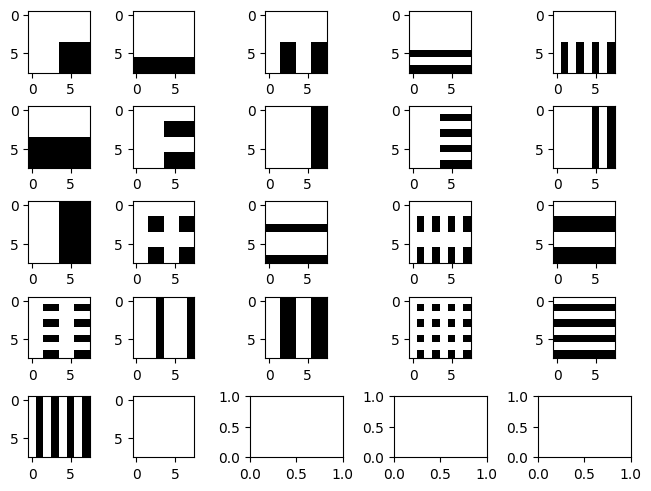

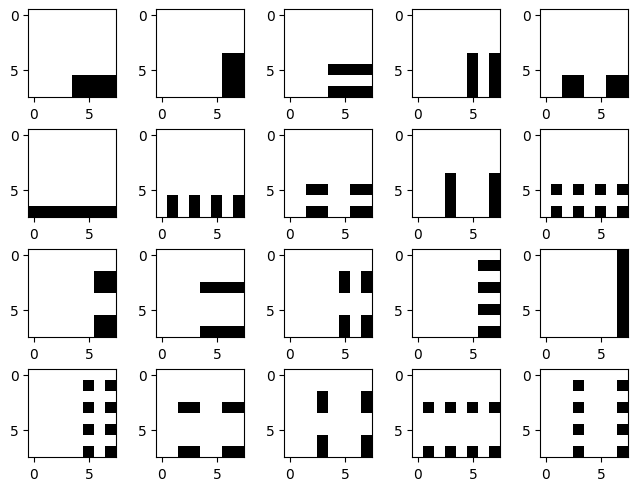

In [7]:
QRM = QuantumReedMuller(2, 2, 6)
gauge=[]
for row in QRM.LZ:
    A=distribute(row)
    gauge.append(A)

stab = []
for row in QRM.SZ:
    stab.append(distribute(row))

#twelve_gauge = [gauge[0], gauge[1], gauge[2], gauge[3], gauge[4], gauge[10], gauge[9], gauge[15], gauge[16], gauge[17], gauge[18], gauge[19]]

show_group(stab, 5)
show_group(gauge, 5)
#show_group(twelve_gauge, 5)






In [22]:
for S in QRM.SZ:
    print(QRM.is_stabilizer(S))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [17]:
def gen_pattern(poly, check):
    n=6
    pattern = get_layout(n)
    for i, row in enumerate(pattern):
        for j, number in enumerate(pattern[i]):
            binary = int2bin(number, n)
            
            #print(f"bianry={binary}, number={number}")
            if binary[poly[0]-1]==check[0] and binary[poly[1]-1]==check[1] and binary[poly[2]-1]==check[2]:
                pattern[i][j]=1
            else:
                pattern[i][j]=0
    return pattern



In [ ]:
all_checks= list(range(int(QRM.N**(1/2))))
all_poly = [[1,2,3], [1,2,4], [3,4,5], [3,4,6],
            [1,5,6], [2,5,6], [4,5,6], [3,5,6],
            [1,2,6], [1,2,5], [2,3,4], [1,3,4]]
    

print(all_checks)

IndentationError: expected an indented block after 'for' statement on line 5 (4039135610.py, line 8)

48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
4

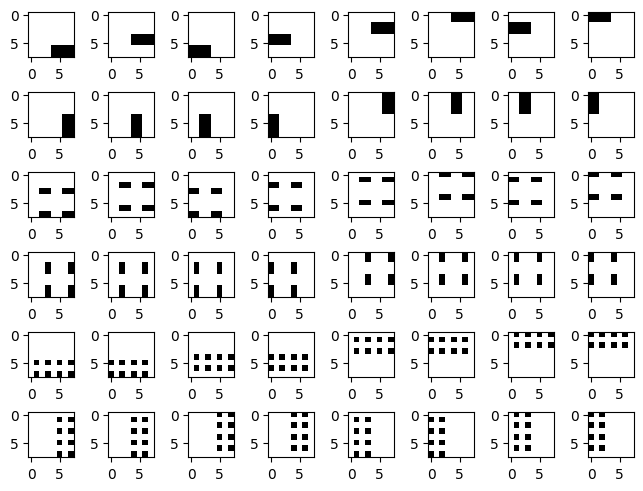

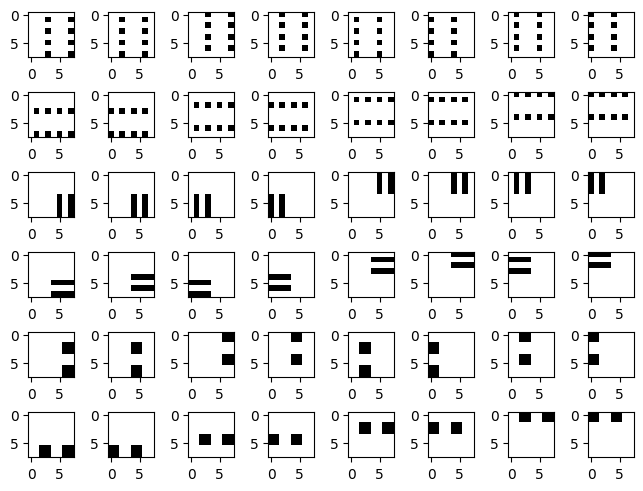

In [18]:
all_checks= list(range(2**3))

for i in all_checks:
    all_checks[i]= int2bin(i, 3)

synd=[]

#list of all gauged logical operators
all_poly = [[1,2,3], [1,2,4], [3,4,5], [3,4,6],
            [1,5,6], [2,5,6], [4,5,6], [3,5,6],
            [1,2,6], [1,2,5], [2,3,4], [1,3,4]]

rank=0
higher_rank=0
number_of_gauge = 6
best_combinations=[]
all_combinations=[]
#performs all combination with 6 of the gauge operator.
#for each combination it traslate each gauge and at the end it checks the rank of the matrix made with the gauge as rows
#Only 
for comb in itertools.combinations(all_poly, number_of_gauge):
    all=[]
    for poly in comb:
        for check in all_checks:
            all.append(gen_pattern(poly, check))
    print(len(all))
    for i, matrix in enumerate(all):
        all[i]=flatten(matrix)

    rank=np.linalg.matrix_rank(all)
    if rank==higher_rank:
        best_combinations.append(comb)
    elif rank>higher_rank:
        higher_rank=rank
        best_combinations=[comb]
    #it only accept combinations with rank bigger than 21 (the rank of the stab generators) plus the number of gauge I'm using
    if rank >= 21+number_of_gauge:
        all_combinations.append(comb)

#Since with number_of_gauge = 6 the possible combinations that give rank 27 is too big,
#I tried to get only the ones that give me the higher rank to narrow down the number of possibilities
#I don't think a higher rank would give a better performance
print(higher_rank)

chosen=[]
for comb in best_combinations:
    group=[]
    for poly in comb:
        for check in all_checks:
            group.append(gen_pattern(poly, check))
    chosen.append(group)

for comb in chosen:
    show_group(comb, 8)


#for i, matrix in enumerate(synd):
#    synd[i]=flatten(matrix)
#
#print(np.linalg.matrix_rank(synd))